# Data proejct. Clumt foot and Hearing impairment

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Importing data from the repository in Github and printing head to check that data is correctly imported. 

In [78]:

# URLs to the CSV files on GitHub
clubfoot_url = "https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-maltheogpeter/main/dataproject/clubfoot.csv"
hearingloss_url = "https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-maltheogpeter/main/dataproject/hearingloss.csv"

# Load the CSV files directly from GitHub
clubfoot_df = pd.read_csv(clubfoot_url)
hearingloss_df = pd.read_csv(hearingloss_url)

# Display the first few rows of each dataframe to confirm loading
print(clubfoot_df.head())
print(hearingloss_df.head())


              name                     email  age    birthday  \
0      Joseph Hill      mmarquez@example.com   23  1923-08-31   
1  Evan Wright DVM  wrightdaniel@example.com   36  1981-09-20   
2   Natalie Snyder   tammybrooks@example.org   27  1963-10-10   
3     Michael Lowe   yolandahull@example.com   64  1930-08-12   
4     Erica Carson   scottpotter@example.org   46  1972-08-31   

                                           address         phone_number  \
0          6400 Miller Mills\nGrantmouth, IL 94365    (631)499-0905x916   
1                        USNV Jordan\nFPO AP 91286         691.756.9714   
2  3177 Gregory Overpass\nAlexandramouth, CA 60660         876-429-1587   
3          52518 Ellis Corners\nReidstad, AL 40423  +1-940-326-1949x358   
4          3233 Brian Wall\nProctorhaven, GU 06062   (313)805-1358x6267   

                        job_title  clubfoot_status  
0                      IT trainer             True  
1      Designer, ceramics/pottery            False  

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

/Users/malthethomassen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


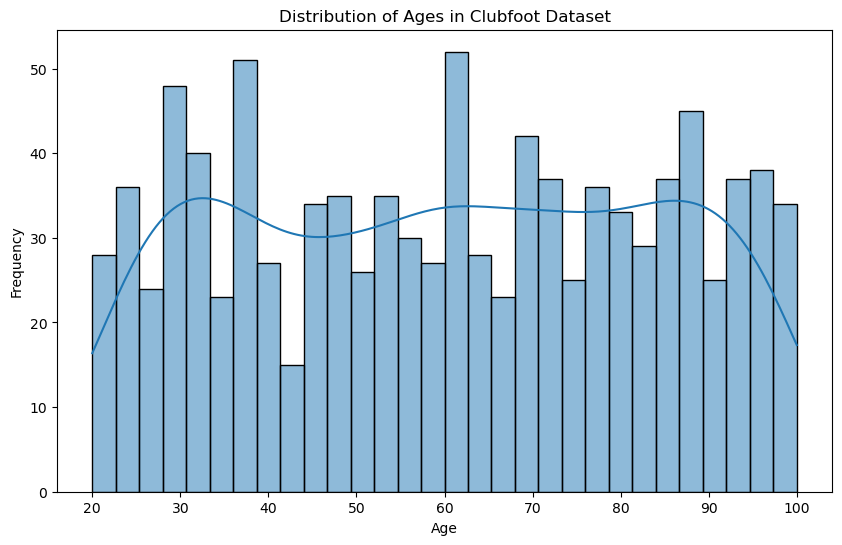

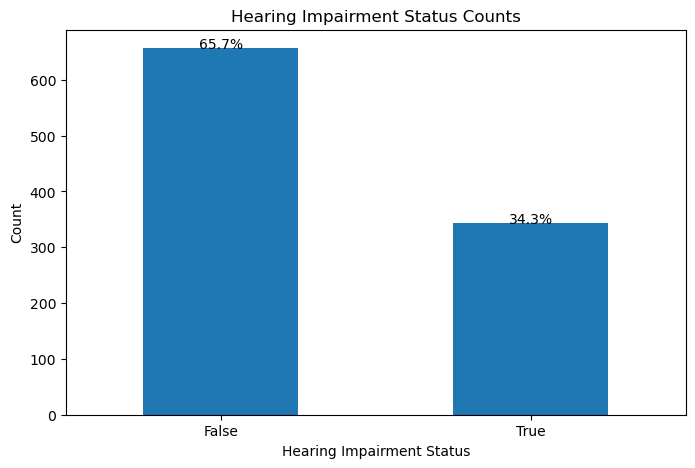

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data has been loaded into clubfoot_df and hearingloss_df
# Example: Histogram of ages in the clubfoot dataset
plt.figure(figsize=(10, 6))
sns.histplot(clubfoot_df['age'], bins=30, kde=True)
plt.title('Distribution of Ages in Clubfoot Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Bar plot of clubfoot status counts
hearing_impairment_counts = hearingloss_df['hearing_impairment'].value_counts()
total_count = len(hearingloss_df)

plt.figure(figsize=(8, 5))
ax = hearing_impairment_counts.plot(kind='bar')
plt.title('Hearing Impairment Status Counts')
plt.xlabel('Hearing Impairment Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add percentages of total
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()




In the above figures we see data for Distribution of Ages in Clubfoot datasets and the Hearing impairment status 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [84]:
# Select the necessary columns and rename for consistency if required
clubfoot_df = clubfoot_df[['name', 'age', 'job_title', 'clubfoot_status']]
hearingloss_df = hearingloss_df[['name', 'hearing_impairment']]

# Ensure the 'name' column is formatted consistently across both datasets
clubfoot_df['name'] = clubfoot_df['name'].str.strip().str.lower()
hearingloss_df['name'] = hearingloss_df['name'].str.strip().str.lower()

# Merge the datasets on the 'name' column
merged_df = pd.merge(clubfoot_df, hearingloss_df, on='name', how='inner')

# Display the first few rows of the merged dataframe to verify the merge
print(merged_df.head())

              name  age                       job_title  clubfoot_status  \
0      joseph hill   23                      IT trainer             True   
1  evan wright dvm   36      Designer, ceramics/pottery            False   
2   natalie snyder   27              Surveyor, quantity            False   
3     michael lowe   64                    Sports coach            False   
4     erica carson   46  Commercial art gallery manager            False   

   hearing_impairment  
0               False  
1                True  
2               False  
3               False  
4               False  


/var/folders/2n/wcy3j0614x342dhwlqpdg04r0000gn/T/ipykernel_20279/1995709422.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubfoot_df['name'] = clubfoot_df['name'].str.strip().str.lower()


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [86]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Age:")
print(merged_df['age'].describe())


print("\nClubfoot Status Counts:")
print(merged_df['clubfoot_status'].value_counts())

print("\nHearing Impairment Status Counts:")
print(merged_df['hearing_impairment'].value_counts())


Descriptive Statistics for Age:
count    1008.000000
mean       60.402778
std        23.311425
min        20.000000
25%        39.000000
50%        61.000000
75%        81.000000
max       100.000000
Name: age, dtype: float64

Clubfoot Status Counts:
clubfoot_status
False    649
True     359
Name: count, dtype: int64

Hearing Impairment Status Counts:
hearing_impairment
False    665
True     343
Name: count, dtype: int64


In [87]:
# Descriptive statistics of age grouped by clubfoot status
clubfoot_stats = merged_df.groupby('clubfoot_status')['age'].describe()
print("Age Descriptive Statistics by Clubfoot Status:")
print(clubfoot_stats)

# Descriptive statistics of age grouped by hearing impairment status
hearing_impairment_stats = merged_df.groupby('hearing_impairment')['age'].describe()
print("\nAge Descriptive Statistics by Hearing Impairment Status:")
print(hearing_impairment_stats)


Age Descriptive Statistics by Clubfoot Status:
                 count       mean        std   min   25%   50%   75%    max
clubfoot_status                                                            
False            649.0  60.741140  23.385409  20.0  39.0  61.0  82.0  100.0
True             359.0  59.791086  23.197075  20.0  38.0  60.0  78.0  100.0

Age Descriptive Statistics by Hearing Impairment Status:
                    count       mean        std   min   25%   50%   75%    max
hearing_impairment                                                            
False               665.0  60.738346  23.602330  20.0  39.0  61.0  82.0  100.0
True                343.0  59.752187  22.756783  20.0  38.0  60.0  79.0  100.0


/Users/malthethomassen/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/malthethomassen/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


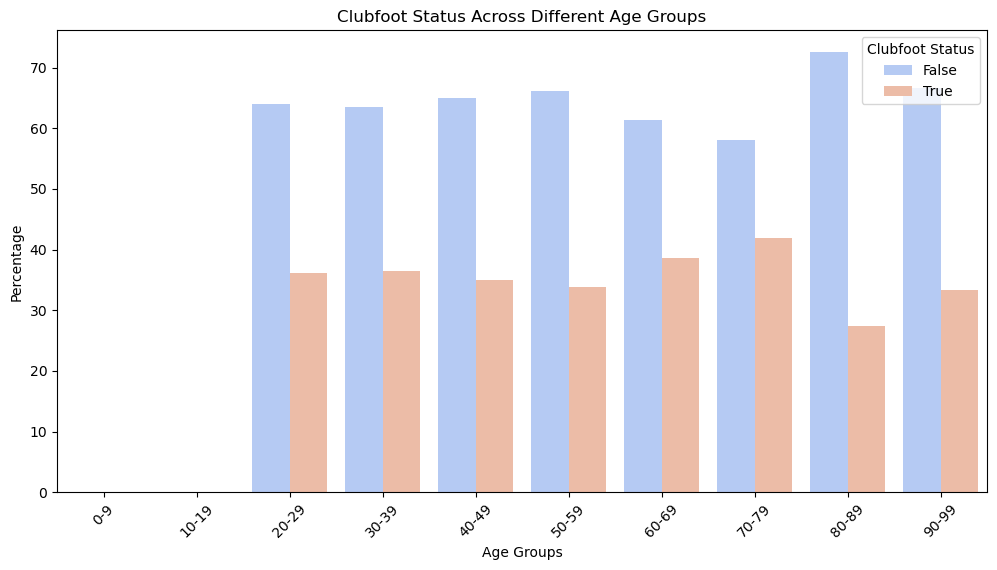

/Users/malthethomassen/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/malthethomassen/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


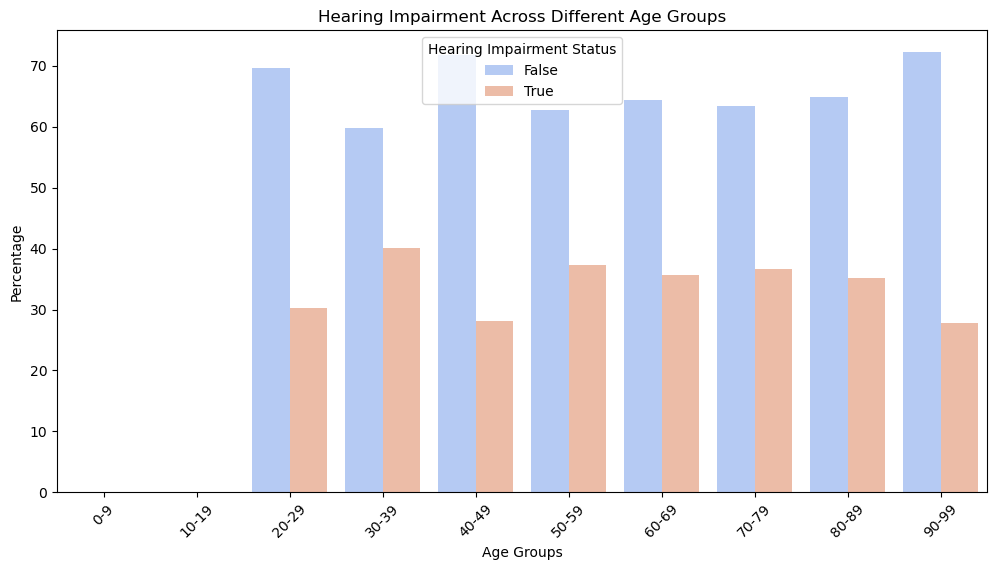

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'merged_df' is already loaded and contains the necessary columns
# Categorize ages
age_bins = pd.cut(merged_df['age'], bins=range(0, 101, 10), right=False, labels=[f"{i}-{i+9}" for i in range(0, 100, 10)])

# Create cross-tabulations and normalize to get percentages
clubfoot_crosstab = pd.crosstab(age_bins, merged_df['clubfoot_status'], normalize='index').reset_index()
hearing_imp_crosstab = pd.crosstab(age_bins, merged_df['hearing_impairment'], normalize='index').reset_index()

# Melt the dataframes for seaborn, convert booleans to strings for proper handling
clubfoot_melted = clubfoot_crosstab.melt(id_vars='age', var_name='clubfoot_status', value_name='percentage')
hearing_imp_melted = hearing_imp_crosstab.melt(id_vars='age', var_name='hearing_impairment', value_name='percentage')
clubfoot_melted['clubfoot_status'] = clubfoot_melted['clubfoot_status'].astype(str)
hearing_imp_melted['hearing_impairment'] = hearing_imp_melted['hearing_impairment'].astype(str)

# Convert percentages to readable format
clubfoot_melted['percentage'] *= 100
hearing_imp_melted['percentage'] *= 100

# Plotting the data
# Plot for clubfoot status across age groups
plt.figure(figsize=(12, 6))
sns.barplot(data=clubfoot_melted, x='age', y='percentage', hue='clubfoot_status', palette='coolwarm')
plt.title('Clubfoot Status Across Different Age Groups')
plt.ylabel('Percentage')
plt.xlabel('Age Groups')
plt.xticks(rotation=45)
plt.legend(title='Clubfoot Status')
plt.show()

# Plot for hearing impairment across age groups
plt.figure(figsize=(12, 6))
sns.barplot(data=hearing_imp_melted, x='age', y='percentage', hue='hearing_impairment', palette='coolwarm')
plt.title('Hearing Impairment Across Different Age Groups')
plt.ylabel('Percentage')
plt.xlabel('Age Groups')
plt.xticks(rotation=45)
plt.legend(title='Hearing Impairment Status')
plt.show()


MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

In [92]:
# Total count of individuals with and without clubfoot
total_with_clubfoot = merged_df[merged_df['clubfoot_status'] == True].shape[0]
total_without_clubfoot = merged_df[merged_df['clubfoot_status'] == False].shape[0]

# Count of individuals with hearing impairment within each group
hearing_imp_with_clubfoot = merged_df[(merged_df['clubfoot_status'] == True) & (merged_df['hearing_impairment'] == True)].shape[0]
hearing_imp_without_clubfoot = merged_df[(merged_df['clubfoot_status'] == False) & (merged_df['hearing_impairment'] == True)].shape[0]

# Compute the share
share_with_clubfoot = hearing_imp_with_clubfoot / total_with_clubfoot
share_without_clubfoot = hearing_imp_without_clubfoot / total_without_clubfoot

print("Share of people with hearing impairment among those who have clubfoot:", share_with_clubfoot)
print("Share of people with hearing impairment among those who don't have clubfoot:", share_without_clubfoot)


Share of people with hearing impairment among those who have clubfoot: 0.362116991643454
Share of people with hearing impairment among those who don't have clubfoot: 0.32819722650231126


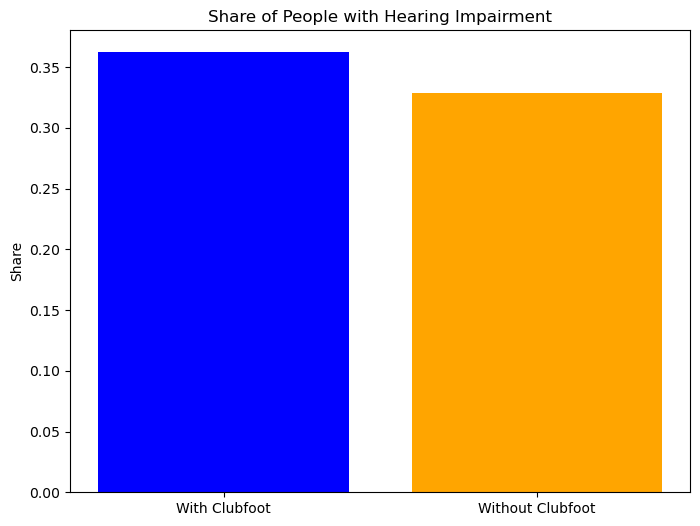

In [93]:
import matplotlib.pyplot as plt

# Calculate the shares
share_with_clubfoot = hearing_imp_with_clubfoot / total_with_clubfoot
share_without_clubfoot = hearing_imp_without_clubfoot / total_without_clubfoot

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['With Clubfoot', 'Without Clubfoot'], [share_with_clubfoot, share_without_clubfoot], color=['blue', 'orange'])
plt.title('Share of People with Hearing Impairment')
plt.ylabel('Share')
plt.show()


# Conclusion

More people with club-foot also have a Hearing Impairment. And 70-70 year olds have the most club-foot